## **Revenue Analysis**

### **Import data**

In [1]:
import pandas as pd
gl_dec22 = pd.read_excel("C:/Users/kmeiermatt001/Desktop/GL_DEC22.xls")

### **Drop empty columns**

In [2]:
new_gl_dec22 = gl_dec22.drop(["Period", "Unnamed: 3", "Unnamed: 15", "Unnamed: 17", "Unnamed: 18"], axis=1)

### **Group data by Customer ID**

In [3]:
# Group data by customer ID
# For each customer ID sum the value of transactions and extract customer name
grouped_data = new_gl_dec22.groupby("Transaction").agg({"Amount":"count", "Customer":"first"})

### **Delete rows where value is zero**

In [4]:
zero_data = grouped_data[grouped_data["Amount"] == 0]
new_data = grouped_data[~grouped_data.index.isin(zero_data.index)]

In [5]:
# Check for zero values
check_zero = new_data[new_data["Amount"] == 0]
check_zero.head()

,Amount,Customer
Transaction,,


### **Reset column indexes**

In [6]:
df1 = new_data.reset_index()

In [7]:
# Check for column names reset to same line
df1.head()

,Transaction,Amount,Customer
0,1,52,Vodacom - JHB Park Station
1,10,22,Commuter - Athlone Station
2,11,35,MTN - Berea Road Station
3,12,35,MTN - Industrial Park
4,15,55,Commuter - Rhodesfeild Station


### **Sort data low to high**

In [8]:
df = df1.sort_values(by="Amount", ascending=True)

### **Visualise results**

#### All customers

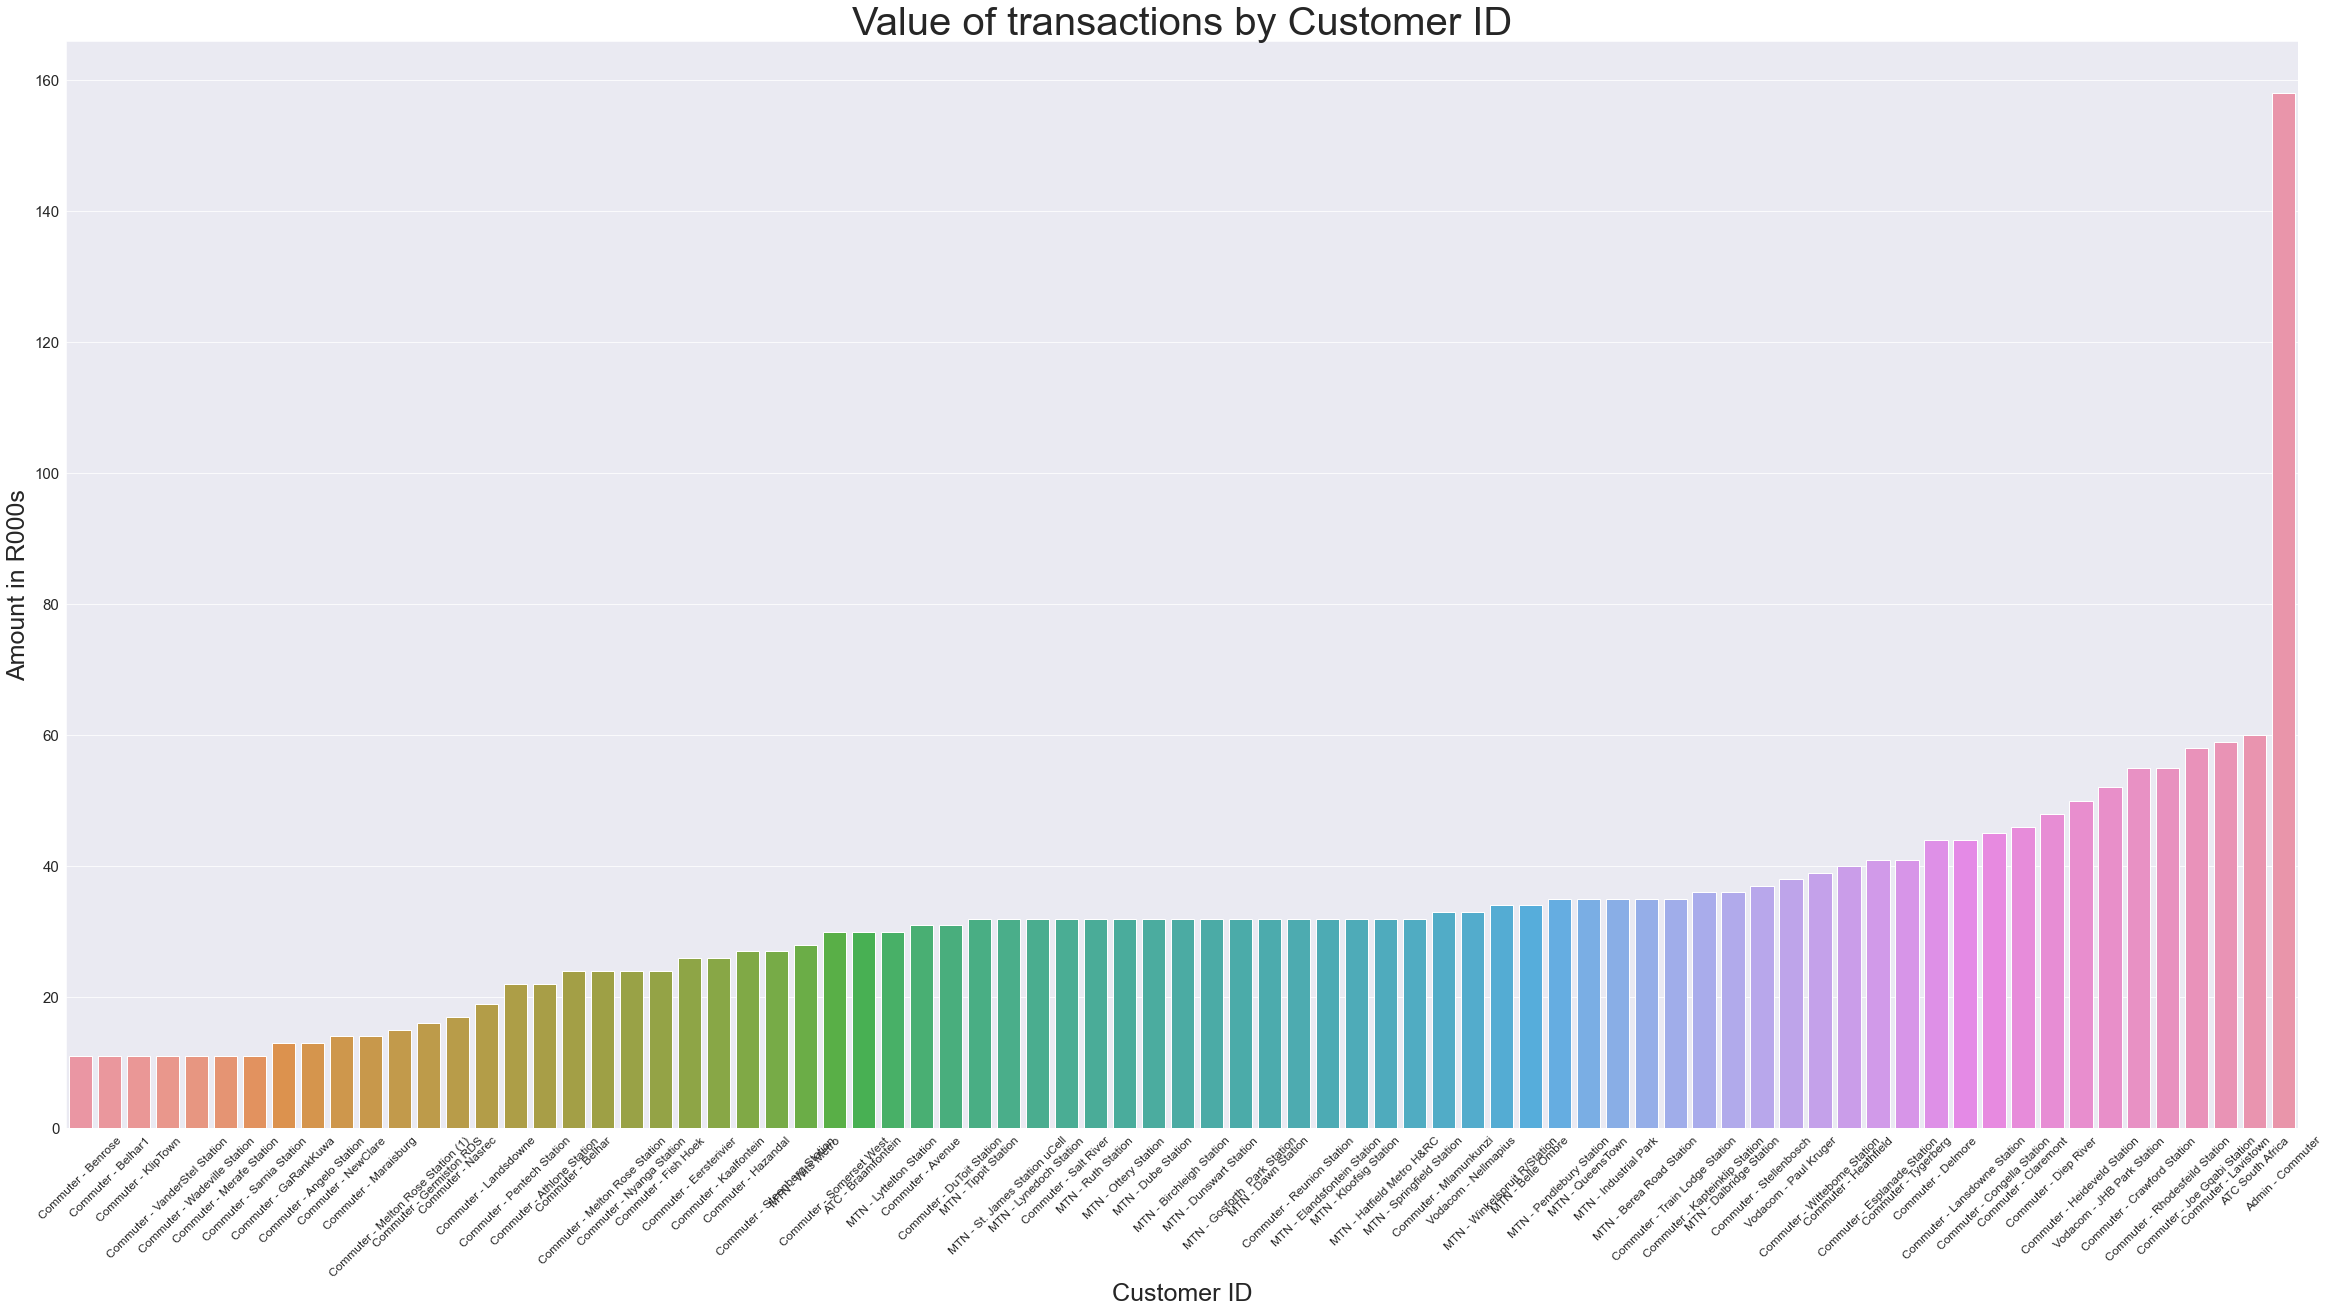

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(40,20))
plt.xticks(rotation=45)
sns.barplot(x = "Customer", y ="Amount", data = df)
plt.title("Value of transactions by Customer ID", size = "40")
plt.xlabel("Customer ID", size = "25")
plt.ylabel("Amount in R000s", size = "25")
plt.yticks(size=15)
plt.xticks(size=12)
plt.show()

#### Top 10 customers by name

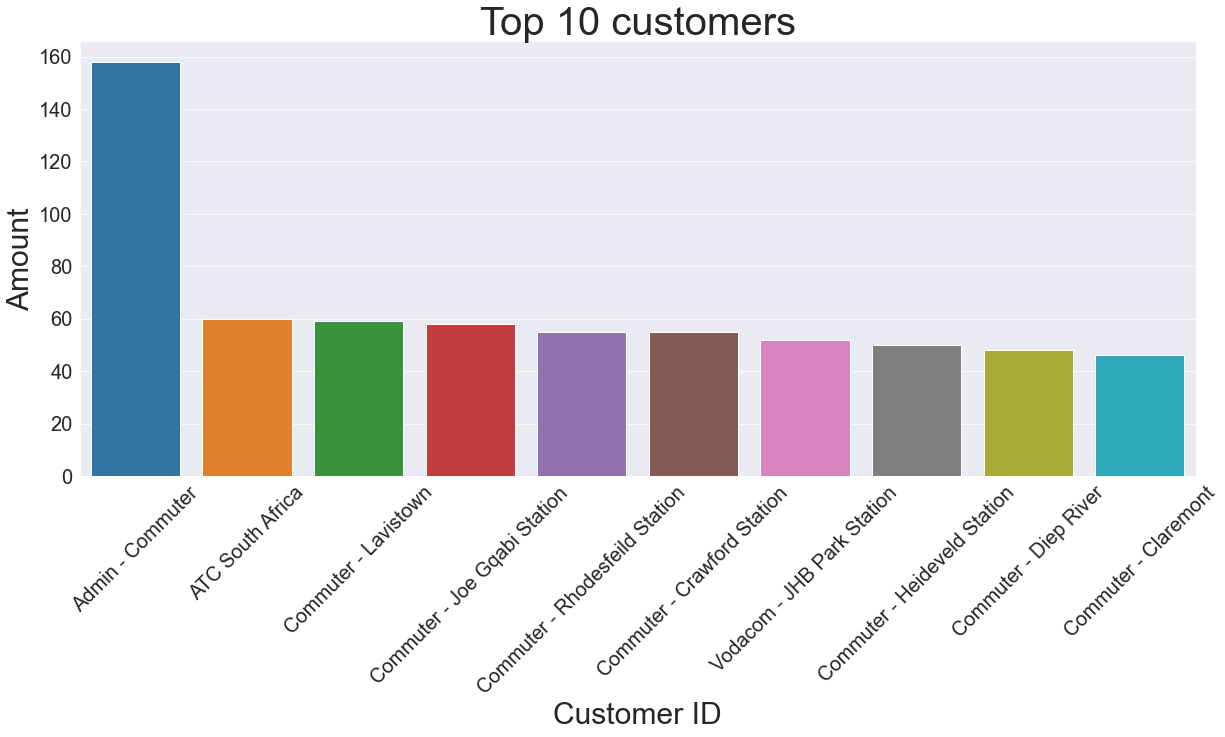

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.barplot(x = "Customer", y ="Amount", data = top10)
plt.title("Top 10 customers", size = "40")
plt.xlabel("Customer ID", size = "30")
plt.ylabel("Amount", size = "30")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()